In [5]:
import yt
import trident
from yt import derived_field

import numpy as np 

from astropy.table import Table
import astropy.units as u

from consistency import *
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from get_refine_box import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

discrete_cmap = mpl.colors.ListedColormap(['#565656','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','darkorange'])
cont_cmap = sns.blend_palette(('#565656','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','darkorange'), n_colors=50, as_cmap=True)
%matplotlib notebook

In [2]:
ds = yt.load("/Users/molly/foggie/halo_008508/nref11n/natural/RD0020/RD0020")
track_name = "/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-05-13 10:10:14,644 Parameters: current_time              = 154.801187733
yt : [INFO     ] 2018-05-13 10:10:14,646 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-05-13 10:10:14,647 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-05-13 10:10:14,649 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-05-13 10:10:14,650 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-05-13 10:10:14,652 Parameters: current_redshift          = 1.99999762534
yt : [INFO     ] 2018-05-13 10:10:14,653 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-05-13 10:10:14,655 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-05-13 10:10:14,656 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 1449/1449 [00:00<00:00, 20204.68it/s]


opening track: /Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track
('using this loc:', <Table length=1>
   col1     col2     col3     col4     col5     col6     col7    col8
 float64  float64  float64  float64  float64  float64  float64  int64
--------- -------- -------- -------- -------- -------- -------- -----
1.9999999 0.493032 0.487924 0.501169 0.495032 0.489924 0.503169    10)


yt : [INFO     ] 2018-05-13 10:10:15,003 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.4940328598022461, 0.4889516830444336, 0.5021543502807617]


yt : [INFO     ] 2018-03-21 17:58:30,282 xlim = 0.500654 0.503654
yt : [INFO     ] 2018-03-21 17:58:30,284 ylim = 0.492533 0.495533
yt : [INFO     ] 2018-03-21 17:58:30,289 xlim = 0.500654 0.503654
yt : [INFO     ] 2018-03-21 17:58:30,294 ylim = 0.492533 0.495533
yt : [INFO     ] 2018-03-21 17:58:30,296 Making a fixed resolution buffer of (('gas', 'dy')) 800 by 800


[0.09349748 0.18699496 0.37398993 0.74797986 1.49595971 2.99191942
 5.98383885] code_length


yt : [INFO     ] 2018-03-21 17:58:30,779 Saving plot RD0020_nref11n_cell_size.png



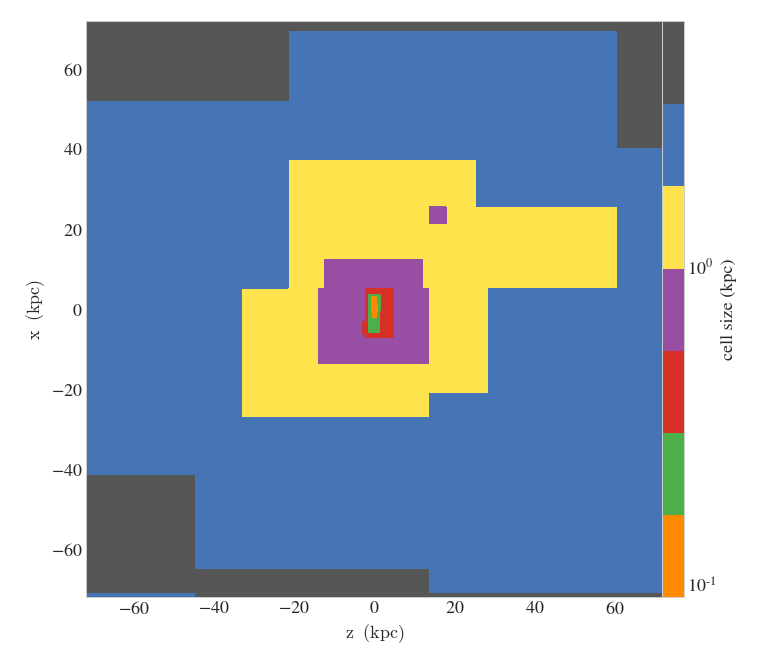

In [8]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

print(np.unique(refine_box['dy']) * 1000*(100/.68)/(1+2.))
s = yt.SlicePlot(ds, "y", 'dy', center=center, width=1.5*refine_width)
# s.set_cmap(('index','grid_level'),"tab20b")
s.set_cmap('dy', discrete_cmap)
s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
#s.set_zlim(('index','grid_level'),6,11)
plot = s.plots['dy']
s._setup_plots()
colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
colorbar.set_label('cell size (kpc)')
s.save('RD0020_nref11n_cell_size.png')
s.show()

In [14]:
ds = yt.load("/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/RD0020/RD0020")
track_name = "/Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-03-21 17:41:09,194 Parameters: current_time              = 154.801032717
yt : [INFO     ] 2018-03-21 17:41:09,196 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-03-21 17:41:09,198 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-03-21 17:41:09,200 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-03-21 17:41:09,202 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-03-21 17:41:09,206 Parameters: current_redshift          = 1.99999968795
yt : [INFO     ] 2018-03-21 17:41:09,208 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-03-21 17:41:09,209 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-03-21 17:41:09,211 Parameters: hubble_constant           = 0.695
Parsing Hierarchy :  55%|█████▍    | 2515/4574 [00:00<00:00, 25140.43it/s]

opening track: /Users/molly/foggie/halo_008508/nref11n/nref11n_nref10f_refine200kpc/halo_track
('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
2.04999996364 0.493091 0.488119 0.501099 0.495091 0.490119 0.503099    10)


Parsing Hierarchy : 100%|██████████| 4574/4574 [00:00<00:00, 24670.31it/s]
yt : [INFO     ] 2018-03-21 17:41:09,919 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.4940309524536133, 0.48897266387939453, 0.5021486282348633]


yt : [INFO     ] 2018-03-21 17:41:45,956 xlim = 0.500649 0.503649
yt : [INFO     ] 2018-03-21 17:41:45,959 ylim = 0.492531 0.495531
yt : [INFO     ] 2018-03-21 17:41:45,962 xlim = 0.500649 0.503649
yt : [INFO     ] 2018-03-21 17:41:45,963 ylim = 0.492531 0.495531
yt : [INFO     ] 2018-03-21 17:41:45,965 Making a fixed resolution buffer of (('gas', 'dy')) 800 by 800
yt : [INFO     ] 2018-03-21 17:41:46,556 Saving plot RD0020_nref11n_nref10f_cell_size.png



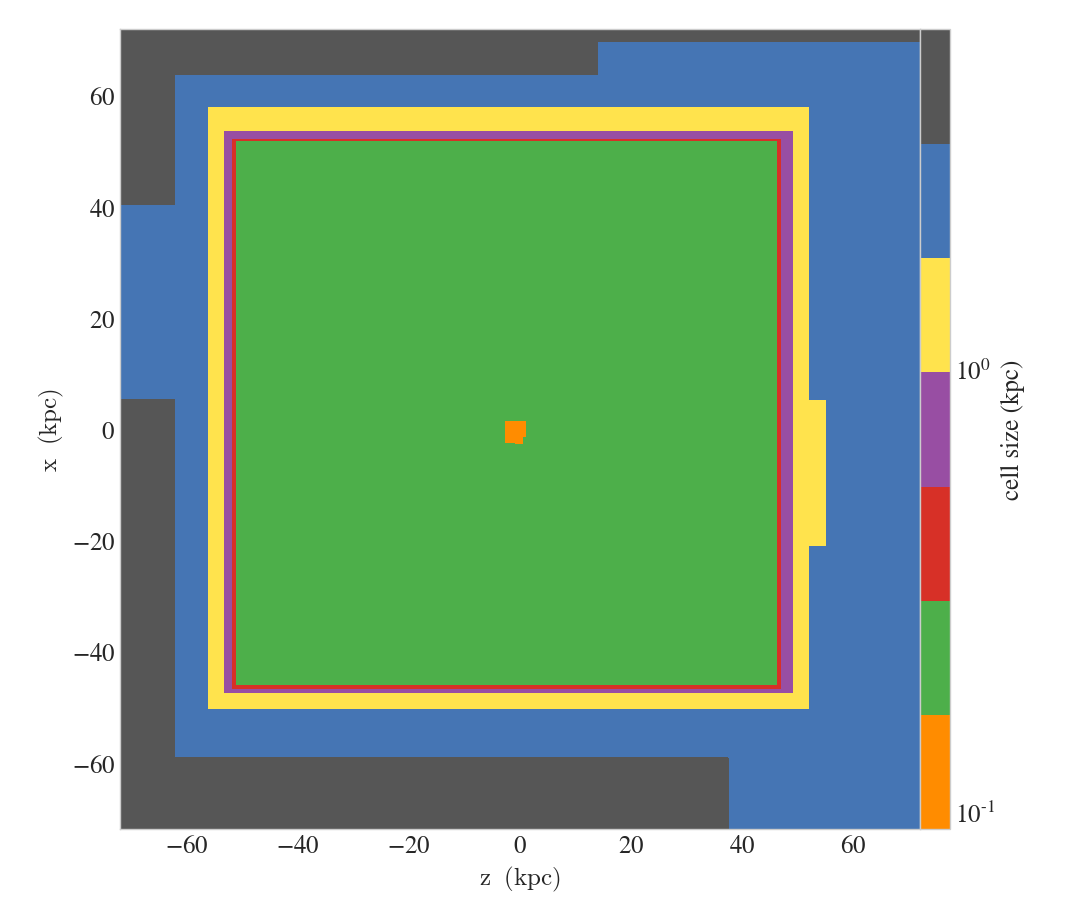

In [15]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

s = yt.SlicePlot(ds, "y", 'dy', center=center, width=1.5*refine_width)
# s.set_cmap(('index','grid_level'),"tab20b")
s.set_cmap('dy', discrete_cmap)
s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
#s.set_zlim(('index','grid_level'),6,11)
plot = s.plots['dy']
s._setup_plots()
colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
colorbar.set_label('cell size (kpc)')
s.save('RD0020_nref11n_nref10f_cell_size.png')
s.show()

In [1]:
# @derived_field(name="cooling_length", units="kpc", force_override=True)
def _cooling_length(field,data):
    """
    Calculates criteria used in enzo CellFlaggingMethod = 7
    """
    cooling_length = data['gas', 'cooling_time']*data['sound_speed']
    return cooling_length.in_units('kpc')



NameError: name 'ds' is not defined

In [34]:
# ds.add_field(('cooling_length'), function=_cooling_length, units="kpc", force_override=True)
# ds.derived_field_list
# refine_box['gas', 'cooling_time']
refine_box['sound_speed'] * refine_box['gas', 'cooling_time']


YTArray([1.13820810e+22, 5.51923313e+21, 6.64015154e+21, ...,
         4.33911111e+24, 4.70781629e+24, 5.05730415e+24]) cm

In [20]:
s = yt.SlicePlot(ds, "y", 'cooling_length', center=center, width=1.5*refine_width)
# s.set_cmap(('index','grid_level'),"tab20b")
s.set_cmap('cooling_length', discrete_cmap)
# s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
#s.set_zlim(('index','grid_level'),6,11)
plot = s.plots['cooling_length']
s._setup_plots()
colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
colorbar.set_label('cooling length (kpc)')
## s.save('RD0020_nref11n_cell_size.png')
s.show()

YTUnitConversionError: Unit dimensionalities do not match. Tried to convert between cm/s (dim (length)/(time)) and kpc (dim (length)).